<a href="https://colab.research.google.com/github/chandra-prakash-94/NeuralNetwork/blob/main/Effect_different_Optimisers_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Regd No. - 22-27-04
## Name:     Chandra Prakash
## M Tech Data Science

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Loading MNIST data set

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

In [ ]:
X_train[0].ndim

2

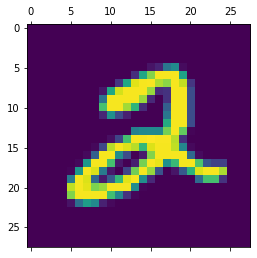

In [ ]:
plt.matshow(X_train[5])

In [ ]:
y_train[5]

2

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]


Creating NN model

Adam optimiser

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4640 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3034 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2662 - accuracy: 0.9261


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2662 - accuracy: 0.9262


[0.26616767048835754, 0.9261999726295471]

SGD optimiser

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7880 - accuracy: 0.8083
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4562 - accuracy: 0.8809
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4031 - accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8966
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.9004


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.9088


[0.33497941493988037, 0.9088000059127808]

Adagrad Optimiser

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5321 - accuracy: 0.6397
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0468 - accuracy: 0.7946
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8837 - accuracy: 0.8210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7938 - accuracy: 0.8332
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7348 - accuracy: 0.8414


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.8522


[0.6900110244750977, 0.8521999716758728]

Comparison of different optimisers

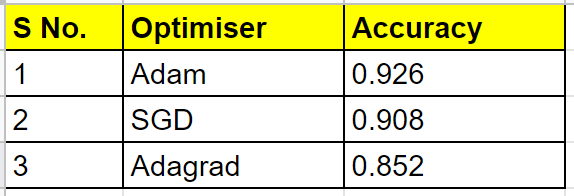

  

---



---



---





---



---



---



---



Prediction


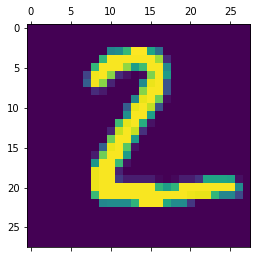

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 1ms/step


array([5.3184938e-01, 1.0858139e-02, 9.9951756e-01, 3.6365193e-01,
       5.5652499e-10, 8.7456083e-01, 8.8988143e-01, 6.3396386e-13,
       2.0524806e-01, 1.7743669e-09], dtype=float32)

np.argmax finds a maximum element from an array and returns the index of it

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  12,   10,  914,   20,    7,    2,   12,   10,   42,    3],
       [   4,    0,   13,  928,    0,   22,    2,   10,   24,    7],
       [   2,    1,    4,    2,  920,    0,    9,    3,   10,   31],
       [  12,    2,    2,   36,    8,  781,   13,    4,   29,    5],
       [  15,    3,    4,    1,    8,   12,  910,    2,    3,    0],
       [   4,    6,   20,   10,   10,    0,    0,  947,    4,   27],
       [  10,    8,    6,   21,    9,   27,    9,   11,  867,    6],
       [  11,    7,    1,   11,   29,    8,    0,   18,    7,  917]],
      dtype=int32)>

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2735 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1271 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0887 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9842


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9766


[0.0736088827252388, 0.9765999913215637]